In [13]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics


import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (20,10) 
pd.options.display.max_columns = None

In [14]:
df= pd.read_pickle('datos/cars_price_norm_est_cod.pkl')
df.head(2)

,Levy,Prod_year,Mileage,Cylinders,Airbags,Price_log,Manufacturer_le,Category_le,Leather_interior_le,Fuel_type_le,Engine_volume_le,Gear_box_type_le,Drive_wheels_le,Doors_le,Color_le
0,1.766963,-0.411248,0.237134,1.375313,1.329406,9.497622,29,4,1,2,58,0,0,2,12
1,0.943936,-0.173337,0.273438,1.375313,0.319668,9.718422,8,4,0,5,52,2,0,2,1


##### <font color=green>  El objetivo de este pairprogramming es que hagáis vuestro primer modelo de machine learning. Para eso recordad que:
##### <font color=green> Deberéis separar la X y la y.
##### <font color=green> Deberéis crear el train y el test.
##### <font color=green> Ajustar vuestro modelo.

Haremos un aprendizaje supervisado de regresión lineal, ya que nuestra variable respuesta (Price) és continua

Y = es price, la variable respuesta

X = resto de variables, que son las predictoras

In [15]:
df.isnull().sum()

Levy                   0
Prod_year              0
Mileage                0
Cylinders              0
Airbags                0
Price_log              0
Manufacturer_le        0
Category_le            0
Leather_interior_le    0
Fuel_type_le           0
Engine_volume_le       0
Gear_box_type_le       0
Drive_wheels_le        0
Doors_le               0
Color_le               0
dtype: int64

Vamos a dividir nuestros datos en conjunto de entrenamiento y test. Dentro de los datos de test eliminaremos la columna price_log que es nuestra columna respuesta.

In [16]:
X = df.drop("Price_log", axis = 1)
y = df["Price_log"]

In [17]:
X.head()

,Levy,Prod_year,Mileage,Cylinders,Airbags,Manufacturer_le,Category_le,Leather_interior_le,Fuel_type_le,Engine_volume_le,Gear_box_type_le,Drive_wheels_le,Doors_le,Color_le
0,1.766963,-0.411248,0.237134,1.375313,1.329406,29,4,1,2,58,0,0,2,12
1,0.943936,-0.173337,0.273438,1.375313,0.319668,8,4,0,5,52,2,0,2,1
2,-1.255121,-1.362894,0.321884,-0.411095,-1.194937,20,3,0,5,18,3,1,2,1
3,0.606949,-0.173337,0.133949,-0.411095,-1.699806,16,4,1,2,42,0,0,2,14
4,-0.291683,0.540397,-0.332738,-0.411095,-0.690069,20,3,1,5,18,0,1,2,12


In [18]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [19]:
# iniciamos la regresión lineal. n_jobs hace referencia al número de nucleos que usaremos de nuestro ordenador. Al indicar -1 significa que los usaremos todos. 

lr = LinearRegression(n_jobs=-1)

In [20]:
# fiteamos el modelo, lo que significa que le pasamos los datos de entrenamiento para que aprenda el algoritmo. Fijaros que para que aprenda, les paso solo los datos de entrenamiento

lr.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [21]:
# es el momento de hacer las predicciones, para eso usarmos el método predict() de sklearn 

y_predict_train = lr.predict(x_train) # hacemos las predicciones para los coches que tenemos en el los datos de entrenamiento
y_predict_test = lr.predict(x_test) # hacemos las predicciones para los coches que tenemos en los datos de test

In [22]:
train_df = pd.DataFrame({'Real': y_train, 'Predicted': y_predict_train, 'Set': ['Train']*len(y_train)})
test_df  = pd.DataFrame({'Real': y_test,  'Predicted': y_predict_test,  'Set': ['Test']*len(y_test)})
resultados = pd.concat([train_df,test_df], axis = 0)
resultados.head()

,Real,Predicted,Set
13506,7.619724,9.269343,Train
1284,9.404508,9.385289,Train
278,10.816934,9.763560,Train
12539,9.303466,9.551433,Train
7494,10.810738,9.918090,Train


In [23]:
resultados['residuos'] = resultados['Real'] - resultados['Predicted']
resultados.head()

,Real,Predicted,Set,residuos
13506,7.619724,9.269343,Train,-1.649618
1284,9.404508,9.385289,Train,0.019219
278,10.816934,9.763560,Train,1.053374
12539,9.303466,9.551433,Train,-0.247967
7494,10.810738,9.918090,Train,0.892648


In [25]:
### Texto de abajo copiado de la lección, hay que ajustar

> Los residuos (o errores) son la diferencia entre los valores observados y los valores que predice el modelo:

Los residuos pueden ser nulos, positivos o negativos:

- Si son nulos entonces no existe ningún error en la estimación, ya que, los valores observados coinciden con los valores estimados.

- Si es positivo entonces el valor observado de Y es mayor que el valor estimado lo que implica que se infraestima la variable Y, en nuestro caso el precio de las casas.

- Si el residuo es negativo entonces el valor observado de Y es menor que su valor estimado y por lo tanto se sobreestima la variable Y, en nuestro caso el precio de las casas

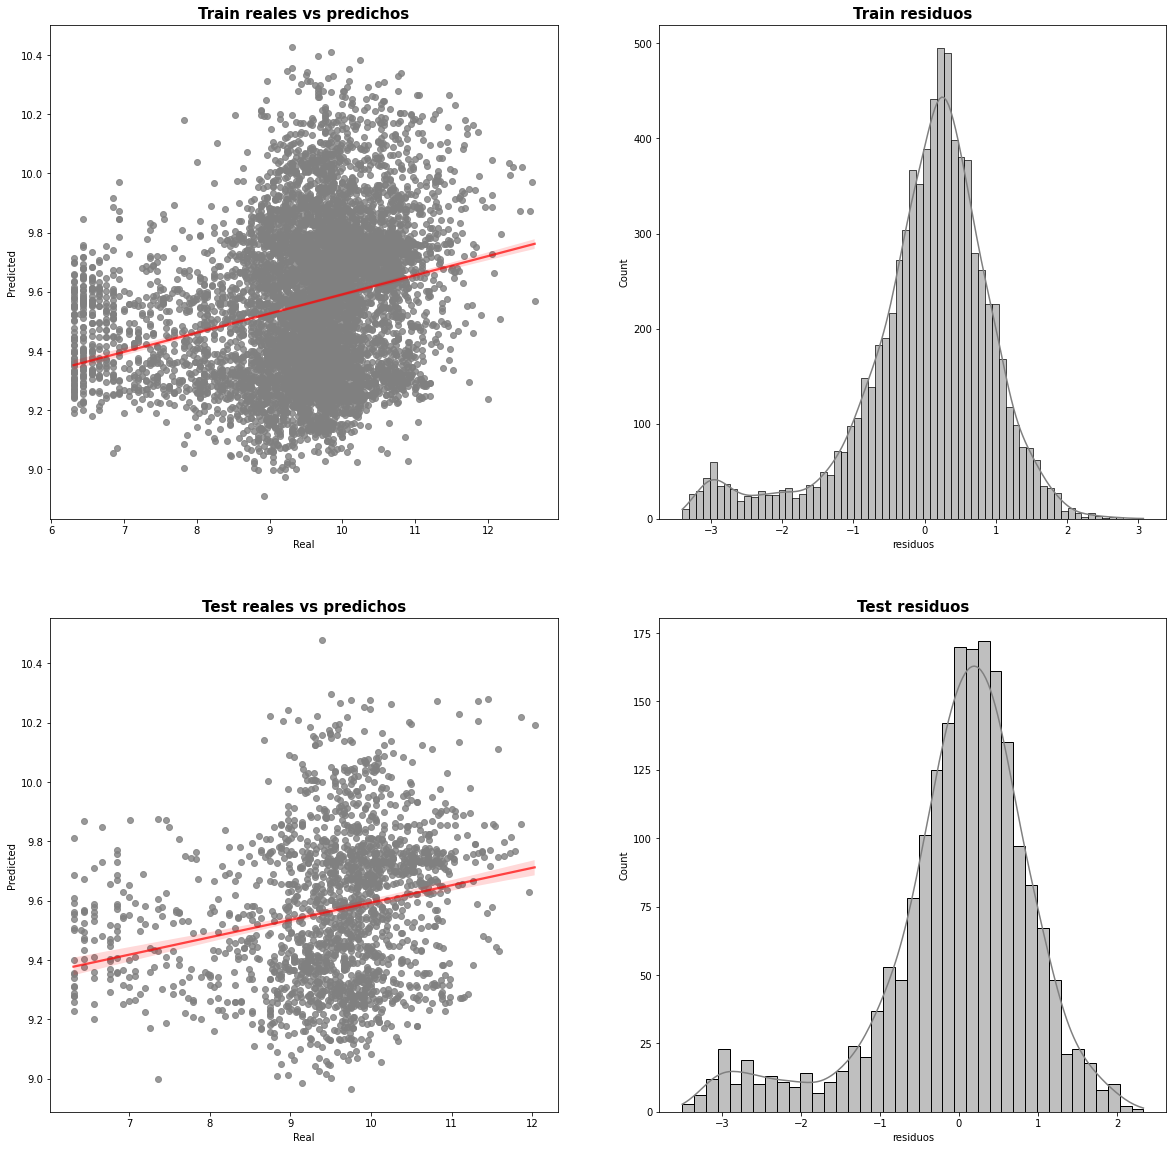

In [26]:
fig, ax = plt.subplots(2,2,figsize=(20,20))


# ploteamos los reales vs los predichos
sns.regplot(data = resultados[resultados['Set'] == "Train"], 
            x = "Real", 
            y = "Predicted", 
            ax = ax[0,0], 
            color = "grey",
            line_kws = {"color": "red", "alpha": 0.7 })


sns.regplot(data = resultados[resultados['Set'] == "Test"], 
            x = "Real",
            y = "Predicted", 
            color = "gray",
            line_kws = {"color": "red", "alpha": 0.7 }, 
            ax = ax[1,0])


# ploteamos los residuos
sns.histplot(resultados[resultados['Set'] == "Train"],
             x="residuos",
             color ="grey",
             kde=True, 
             ax = ax[0,1])


sns.histplot(resultados[resultados['Set'] == "Test"],
             x="residuos",
             color = "grey",
             kde=True, 
             ax = ax[1,1])

ax[0,0].set_title("Train reales vs predichos", fontsize = 15, fontweight = "bold")
ax[0,1].set_title("Train residuos", fontsize = 15, fontweight = "bold")
ax[1,0].set_title("Test reales vs predichos", fontsize = 15, fontweight = "bold")
ax[1,1].set_title("Test residuos", fontsize = 15, fontweight = "bold");


Realizamos la validación cruzada

In [27]:
# Validación cruzada repetida con una única métrica
# ==============================================================================
cv_scores = cross_val_score(
                estimator = LinearRegression(), # que algoritmo  queremos usar para ajustar el modelo
                X         = X, # cuales son las variables X. Fijaos que no le pasamos el X_train, le pasamos todos los datos de la X
                y         = y, # cual es nuestra variable y
                scoring   = 'neg_root_mean_squared_error', # que métrica queremos calcular
                cv        = 10 # número de veces que queremos hacer la validación
             )

print(f"Métricas validación cruzada: {cv_scores}") # sacamos las métricas para cada una de las iteraciones
print(f"Média métricas de validación cruzada: {cv_scores.mean()}") # calculamos la media de todas las iteraciones. 

Métricas validación cruzada: [-1.08031054 -1.05018997 -0.97945448 -0.97912055 -0.93876615 -0.97415692
 -0.9406235  -0.925045   -0.8750148  -0.89008974]
Média métricas de validación cruzada: -0.9632771654028088


In [28]:
# para saber que métricas podemos usar: 

metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [29]:
# Validación cruzada repetida con múltiples métricas
# ==============================================================================

cv_scores = cross_validate(
                estimator = LinearRegression(),
                X         = X,
                y         = y,
                scoring   = ('r2', 'neg_root_mean_squared_error'),
                cv        = 10)

# Se convierte el diccionario a dataframe para facilitar la visualización
cv_scores = pd.DataFrame(cv_scores)
cv_scores


,fit_time,score_time,test_r2,test_neg_root_mean_squared_error
0,0.023274,0.001882,0.025827,-1.080311
1,0.003745,0.001216,0.023984,-1.050190
2,0.013612,0.001374,0.062530,-0.979454
3,0.003233,0.001125,0.043768,-0.979121
4,0.003926,0.001276,0.061546,-0.938766
5,0.003163,0.001812,0.069080,-0.974157
6,0.002481,0.000880,0.041455,-0.940624
7,0.002021,0.000862,0.070447,-0.925045
8,0.001957,0.000934,0.055678,-0.875015
9,0.003291,0.001153,0.102074,-0.890090


In [30]:
# calculamos la media para cada una de las métricas

print(f'la media para el r2 es {cv_scores["test_r2"].mean()}')
print(f'la media para el RMSE es {abs(cv_scores["test_neg_root_mean_squared_error"].mean())}')

la media para el r2 es 0.05563885866946415
la media para el RMSE es 0.9632771654028088


In [31]:
# hay que interpretar los datos y no me queda claro el último punto que piden en el pair de : ajustar vuestro modelo